**Activity Designed by:**  Ms. Achala  and Team { Dr. Shabbeer, Mr. Ashwini M, Dr. Sohbana P, Ms. Shanti K }

### Dataset information [ Bangalore House Pricing ]


**About this file**<br>
What are the things that a potential home buyer considers before purchasing a house?<br>
The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence?<br> What about the most important factor — the price?<br>

**For example,** <br> for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

Reference: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data/data

In [28]:
#Imports the neccessary library
import pandas as pd
from sklearn.preprocessing import *
from matplotlib import pyplot as plt

In [3]:
#Load the dataset
data_path = "datasets/Bengaluru_House_Data.csv"
house_df = pd.read_csv(data_path)
house_df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data pre-processing

In [4]:
# Summary of the Dataset
house_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
#Data types of the given attributes in dataframe
house_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
#Demomnsion of the Dataset
print(f"{house_df.shape[0]} rows \n {house_df.shape[1]} columns")

13320 rows 
 9 columns


In [14]:
#Information about column names in the Dataset
cols = house_df.columns
cols

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Handling missing values 

In [15]:
#Find the missing values in the given dataset
for i in cols:
    print(f"{i} has {house_df[i].isna().sum()} missing values")

area_type has 0 missing values
availability has 0 missing values
location has 1 missing values
size has 16 missing values
society has 5502 missing values
total_sqft has 0 missing values
bath has 73 missing values
balcony has 609 missing values
price has 0 missing values


In [20]:
#Calculate the total missining values in the given dataset
print(f"Total number of missing values in the dataset: {house_df.isna().sum().sum()}")

Total number of missing values in the dataset: 6201


In [23]:
#Lets take one attribute and using groupby function,  calculate the count of all area types in the dataset
area_type_counts = house_df.groupby('area_type').size()
print(area_type_counts)

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64


<AxesSubplot:>

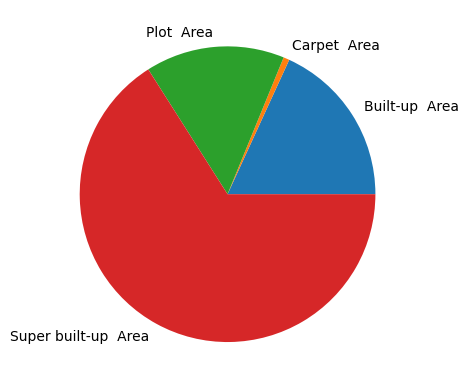

In [41]:
#Visualization plot for above inference
area_type_counts.plot(kind="pie")

In [52]:
#Handling missing values: drop all the missing values from the given dataset
house_df.drop("society",inplace=True,axis=1)
for col in ["balcony","bath"]:
    house_df[col].fillna(0.0,inplace=True)
house_df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [12]:
#verify the missing values from the updated dataframe.

### Feature Engineering 

In [57]:
#Apply the feature engineering in size columns
house_df["size"] = house_df["size"].str.split().str.get(0).astype(float)
house_df["size"].fillna(0.0)

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: size, Length: 13320, dtype: float64